## Importing Libraries

In [175]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Implementing Polynomial Regression Model

In [176]:
class PolynomialRegression():
    def __init__(self, lr = 0.001, epochs = 1000, degree = 2):
        self.lr = lr
        self.epochs = epochs
        self.degree = degree
        self.weights = None
        self.bias = None
        
    def _generate_polynomial_features(self,X):
        X = X.reshape(X.shape[0],1)
        X_poly = X.reshape(X.shape[0],1)
        for deg in range(2, self.degree+1):
            X_poly = np.concatenate((X_poly, X**deg), axis = 1)
        return X_poly
    
    def fit(self, X, y):
        X_poly = self._generate_polynomial_features(X)
        n_samples, n_features = X_poly.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        cost = []
        it = []
        
        for i in range(self.epochs):
            y_pred = np.dot(X_poly,self.weights) + self.bias
            cost.append(np.sum((y_pred - y)**2)/n_samples)
            it.append(i+1)
            dw = (1 / n_samples) * np.dot(X_poly.T, (y_pred.T - y))
            db = np.sum(y_pred.T - y) / n_samples
            
            self.weights = self.weights - (self.lr * dw)
            self.bias = self.bias - (self.lr * db)
            
            plt.plot(it,cost,color = 'r')
    def predict(self,X):
        X_poly = self._generate_polynomial_features(X)
        
        y_pred = np.dot(X_poly, self.weights) + self.bias
        return y_pred
    

## Import Dataset

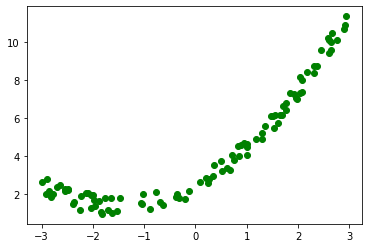

In [177]:
# dataset = pd.read_csv('Position_Salaries.csv')
# X = dataset.iloc[:, 1:2].values
# y = dataset.iloc[:, -1].values
X = 6 * np.random.rand(100,1) - 3
y = (0.5 * X**2 + 1.5*X + 2 + np.random.rand(100,1))
y = y[:,0]
plt.scatter(X,y,color = 'g')

## Splitting Data into Training and Test Sets

In [178]:
# As our dataset contains only 10 examples don't split the data into training and test set just do the training
# See if the model can fit to the data or not

## Fitting Polynomial Regression model to the dataset

Y pred
 [ 4.17692395  3.3654257   1.99923452  2.11395642  1.49779458  9.7938952
  2.8536959   1.53324302  8.57827354  9.79647884  4.48196577  1.48331845
  2.01509368  1.74741245 11.15063473  1.95184127  1.48688486  6.50017485
  1.57918541  1.45294891  5.8946526   9.94571362  1.43697076  5.27896864
  3.58810378  6.91530412  1.57361     2.80296235  2.61058903  9.72168315
  1.71935576  4.07919399  3.70637339  9.92059477  1.9449959   2.91829625
 10.43574534  4.94119257  7.62551977  4.47263771  4.46628473  1.5540335
  5.22488263  1.54825048  8.59818164  1.40536964  1.42341093  5.39979851
  7.71343564  1.61339826  1.69234183  3.0588594   2.19707461  1.58140014
  1.42037913  4.05653871  8.0941419   1.83869441 11.03946416  5.78114957
  2.19941973  7.304287    3.8735548   2.41684375  5.99981866 10.0359818
  2.50627254  1.49806069  6.42095263  7.59652462  8.86191667  2.28909853
  6.69283579  1.63611321  7.77642763  1.4750681   1.64312346  3.08029458
  9.10609284  2.60169696  1.73467129  2.290274

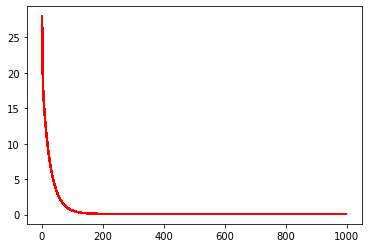

In [179]:
poly_regressor = PolynomialRegression(lr = 0.1,epochs = 1000,degree = 2)
poly_regressor.fit(X,y)
y_pred = poly_regressor.predict(X)
cost = 1/ X.shape[0] * (np.sum(np.power((y_pred-y),2)))
print('Y pred\n',y_pred,'\n Y \n',y)

## Visualizing the Training Result

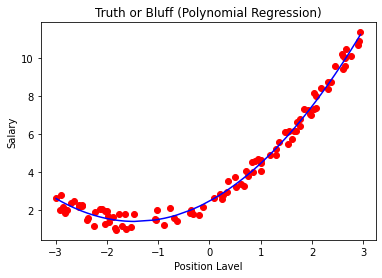

In [180]:
# Sort the data for proper plotting
sorted_indices = np.argsort(X.flatten())
X_sorted = X.flatten()[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

plt.scatter(X, y, color = 'red')
plt.plot(X_sorted,y_pred_sorted, color = 'b')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position Lavel')
plt.ylabel('Salary')
plt.show()